# Dataload and import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
## 본인의 디렉토리에 맞게 설정하세요 
data = pd.read_csv('./assignment_2/assignment_2.csv')
data.head()

FileNotFoundError: File b'./assignment_2/assignment_2.csv' does not exist

In [ ]:
#data['salary']=data['salary'].apply(lambda x : x/10000)

# Logistic regression 해야하는 data 의 scatter plot

In [ ]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

In [ ]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [ ]:

## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
print(cols)
cols = cols[-1:] + cols[:-1]
print(cols)
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)

'''
orig_X = data.iloc[:, 1:]

X = orig_X[['experience','salary']]
X['bias'] = orig_X['bias']
cols = X.columns.tolist()
print(cols)
cols = cols[-1:] + cols[:-1]
print(cols)
X = X[cols]
X = X.values.tolist()
X= np.array(X)
'''


#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
type(X)

## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [7]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)
a = np.dot( X, beta)
a

array([0.93545251, 0.83645882, 0.77495392, 0.63171086, 0.4702116 ,
       0.43596894, 0.3464695 , 0.2849646 , 0.24047112, 0.13322796,
       0.93220639, 0.83270023, 0.13723065, 0.46196213, 0.87570485,
       0.19846717, 0.48771122, 0.54321209, 0.90269871, 0.47921765,
       0.56295715, 0.45022244, 0.44770862, 0.71095948, 0.18396957,
       0.53047173, 0.18846046, 0.78920743, 0.29973058, 0.52195388,
       0.12571078, 0.82869755, 0.94570332, 0.92720303, 0.24771992,
       0.94670399, 0.96996355, 0.34995971, 0.78696198, 0.50320949,
       0.3537183 , 0.76245766, 0.93545251, 0.90020917, 0.99271062,
       0.59746819, 0.76621625, 0.33621868, 0.88744453, 0.30222012,
       0.76245766, 0.49422773, 0.60571767, 0.78395997, 0.49996338,
       0.73695267, 0.91746469, 0.73170521, 0.64020443, 0.78220272,
       0.34747017, 0.15997773, 0.71520626, 0.30146354, 0.60947626,
       0.77995728, 0.86821195, 0.42447335, 0.40597306, 0.31147026,
       0.27095519, 0.55597673, 0.27398148, 0.9686945 , 0.47721

## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [8]:
'''
함수를 구현하세요 
INPUT: 회귀식(a)
Output: P
'''
def sigmoid(a):
    return 1/( 1 + np.exp(-a))
P = sigmoid(a)

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = ylog\sigma(x,B) + (1-y)log(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ Log \  Likelihood  $$
## $$ J(x_i,y_i|B) = \frac{1}{N}(-y_i\sum_{i=1}^N  log\sigma(x_i,B)- (1-y_i)\sum_{i=1}^Nlog(1-\sigma(x_i,B))) $$ 


In [9]:
'''
Negative Log likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative log Likelihood 값의 평균 합 

'''
#(1/P.shape[0])*((-T*np.log(P)) - ((1-T)*np.log(1-P))).sum()
def loss(P, Y):
    return (-Y * np.log(P) - (1 - Y) * np.log(1 - P)).mean()
loss(P,T)

0.8976516010035538

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [10]:
'''
위에서 구한 Negative log Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''
#gradient = np.dot(X.T, (P-T))
#beta = beta -( gradient * Learning_rate)
Learning_rate = 0.01
for i in range(100000):
    a = np.dot(X,beta)
    P = 1/( 1 + np.exp(-a))
    gradient = np.dot(X.T, (P-T)) / T.shape[0]
    beta -= Learning_rate * gradient
beta

array([-2.110728  ,  4.5345115 , -4.40216377])

In [16]:
'''MALE, FEMALE 표준화'''
normalized_data = data[['Label','bias']]
normalized_data[['experience','salary']] = (data[['experience','salary']]-data[['experience','salary']].mean())/data[['experience','salary']].std()

normalized_data.iloc[:,:]

MALE = normalized_data[normalized_data['Label']==1]
FEMALE = normalized_data[normalized_data['Label'] == 0]
MALE

,Label,bias,experience,salary
0,1,1,-1.509461,-1.203582
2,1,1,-0.877300,-0.431230
8,1,1,1.300146,1.049112
9,1,1,1.756707,1.049112
12,1,1,1.756707,0.791661
21,1,1,0.492384,-0.238142
24,1,1,1.510866,1.499650
25,1,1,0.176303,-0.624318
28,1,1,1.124545,-0.109417
32,1,1,-1.544582,-1.332307


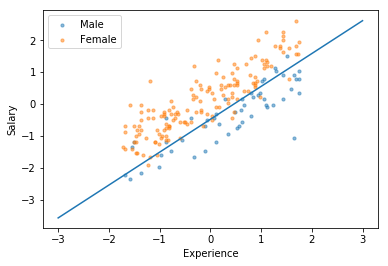

In [17]:
'''추정된 회귀계수가 beta=[B0,B1,B2]이라면, 다음 코드를 통해 시각화가 가능합니다'''


fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(-3, 3,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()

### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다